# Part A: Analysing text data

In this assignment we are going to analysy two books which are based on software development methodologies. The two files/books which we are going to use for this part of the assignment is:
* Book1: "Agile Processes in Software Engineering and Extreme Programming.txt"
* Book2: "Scrum Handbook.txt" 

Our task will be to see the distribution of words, the most common words in both books and the average frequency. This approach can also be scaled to find the most common words and distribution of all words in the Internet.

## Step1: Importing pyspark and initialising it

In this step we will be importing a library called pyspark. Pyspark is a python API for spark. In this we are going to use "SparkContext" which is a main entry for Spark functionality. We are also going to use "SparkConf" which is used for configuring Spark. Now our first step would be to import SparkContext and SparkConf libraries from pyspark

In [1]:
# !pip install pyspark
from pyspark import SparkContext, SparkConf 
from pyspark.sql import SparkSession


Now that we have imported the required libraries we now use this to create a Spark Session and configure Spark to be used.

In [2]:
# Construct a configuration
conf = SparkConf()
conf.set("spark.app.name", "Advanced Spark Programming")
conf.set("spark.master", "local[2]")
conf.set("spark.ui.port", "4050") # Override the default port 4040


sc = SparkContext(conf=conf)
spark = SparkSession(sparkContext=sc)

In [3]:

# We add this line to avoid an error : "Cannot run multiple SparkContexts at once". 
# If there is an existing spark context, we will reuse it instead of creating a new context.
sc = SparkContext.getOrCreate()

# local[*]: run Spark locally with as many working processors as logical cores on your machine.
# In the field of `master`, we use a local server with as many working processors (or threads) as possible (i.e. `local[*]`). 
# If we want Spark to run locally with 'k' worker threads, we can specify as `local[k]`.
# The `appName` field is a name to be shown on the Sparking cluster UI. 

# If there is no existing spark context, we now create a new context
if (sc is None):
    sc = SparkContext(master="local[*]", appName="Assignment1")

spark = SparkSession(sparkContext=sc)

## Step2: Creating Resilient Distributed Datasets (RDDs)

The main abstraction which Spark provides is a resilient distributed dataset also known as RDD. A RDD is a collection of elements which is partitioned across the nodes of the cluster that can be operated on in parallel. Now in this step we are going to create RDD's for the files which is given to us in the assignment specification.

In [4]:
# reading all the files which is given in the assignment
agile_process = sc.textFile('Agile Processes  in Software Engineering  and Extreme Programming.txt')
scrum_handbook = sc.textFile('Scrum\ Handbook.txt')

This part of the code is to display the total number of elements in each RDD.

In [5]:
# count of number of lines for each file which has been read
print("Number of lines in Agile Processes txt file is: ",agile_process.count())
print("Numbe of lines in Scrum Handbook txt file is: ",scrum_handbook.count())

Number of lines in Agile Processes txt file is:  21569
Numbe of lines in Scrum Handbook txt file is:  4617


## Step3:  Cleaning and Manipulating the text

Now in this step there is some data wrangline which has to be done on the given datasets

The steps which have to be done here are:
1. Removes all characters which are not alphabets except space(s).
2. Changes all upper case letters to lowercase.
3. Removes all leading or trailing spaces.

The function which is written below is to take a string in consideration and so all the tasks which are mentioned above. Each element in the RDD is a string and hence we are going to perform the tasks on a string. In the function the 'isalpha' fucntion is being used to remove any non alphabetic characters. The 'lower' function is being used to convert the string to lower case and the strip function is being used to remove all the begining and trailing spaces.

In [6]:
# function to remove all characters which are not alphabets except spaces
## using the isalpha function we can find out wether a given character is an alphabet or not
# this function is used to remove all the leading and trailing spaces
def cleaning(inp):
    retstr = ""
    for i in inp:
        if not i.isalpha() and i!=" ":
                i = ""        
        retstr += i
    return retstr.lower().strip()

Now that we have formed the function we now use this function to perform the wrangling/cleaning tasks on the RDD. The function can be used to perform a given task on the RDD using the map function.

In [7]:
# mapping the above function to the RDD
agile_processcess_clean = agile_process.map(cleaning)
scrum_handbook_clean = scrum_handbook.map(cleaning)

We now have the cleaned RDD with us!

## Step4: Transforming data and counting the words

In this step we are going to split the RDD based on spaces and then find the frequency of all words. Each element in the list would be the tuple and each tuple would consist of the word and the number of occurences of the word. We do this for both the datasets Agile and Scrum.

### Case1: Agile Process

Now we obtain the word frequency of the Agile dataset.

In [8]:
# this code is to split all the words and then find the occurences of each of the words

tokenized_agile = agile_processcess_clean.flatMap(lambda line: line.split(" "))\
.filter(lambda words: words != '')

# Extract the first word of each line (the log level) and do a count
word_frequency_agile = tokenized_agile.map(lambda words: (words,1))\
.reduceByKey(lambda x,y: x+y) 


Now that we have found the word frequency of the Agile dataset we now sort the tuples based on the word frequency count and display only the top 20 occurences of words.

In [9]:
# this code is to display the top 20 occurences of the words

word_frequency_swap_agile = word_frequency_agile.map(lambda x: (x[1],x[0]))
top20_agile = word_frequency_swap_agile.sortByKey(0,1).take(20)
print('Top 20 most frequent words in Book1 or Agile is: ')
top20_agile

Top 20 most frequent words in Book1 or Agile is: 


[(8145, 'the'),
 (3965, 'and'),
 (3944, 'of'),
 (3714, 'to'),
 (3076, 'in'),
 (2701, 'a'),
 (1539, 'is'),
 (1355, 'that'),
 (1194, 'for'),
 (1028, 'as'),
 (1015, 'on'),
 (975, 'we'),
 (969, 'with'),
 (922, 'software'),
 (915, 'this'),
 (784, 'are'),
 (748, 'agile'),
 (741, 'it'),
 (737, 'development'),
 (711, 'was')]

### Case2: Scrum Handbook

Now we obtain the word frequency of the Scrum dataset.

In [10]:
# this code is to split all the words and then find the occurences of each of the words

tokenized_scrum = scrum_handbook_clean.flatMap(lambda line: line.split(" "))\
.filter(lambda words: words != '')

# Extract the first word of each line (the log level) and do a count
word_frequency_scrum = tokenized_scrum.map(lambda words: (words,1))\
.reduceByKey(lambda x,y: x+y) 


Now that we have found the word frequency of the Scrum dataset we now sort the tuples based on the word frequency count and display only the top 20 occurences of words.

In [11]:
# this code is to display the top 20 occurences of the words

word_frequency_swap_scrum = word_frequency_scrum.map(lambda x: (x[1],x[0]))
top20_scrum = word_frequency_swap_scrum.sortByKey(0,1).take(20)
print('The 20 most occuring words in scrum or Book2 is: ')
top20_scrum

The 20 most occuring words in scrum or Book2 is: 


[(1238, 'the'),
 (537, 'of'),
 (534, 'and'),
 (477, 'to'),
 (451, 'a'),
 (395, 'scrum'),
 (360, 'in'),
 (348, 'is'),
 (260, 'team'),
 (232, 'product'),
 (195, 'for'),
 (181, 'that'),
 (165, 'it'),
 (149, 'on'),
 (146, 'sprint'),
 (142, 'this'),
 (132, 'with'),
 (124, 'as'),
 (119, 'are'),
 (118, 'by')]

## Removing all the stop words

Stop words can be defined as words which are filtered out before processing of natural language data.Stop words are the words which commonly occur in the text. Usually while doing anaysis we would not want one specific set of words taking up space in the datset. Thus one of the task which we do before analysing datasets is removing stopwords.

In python stopwords can be handeled using a library calles NLTK(Natural Language Toolkit). Our first task in this step now would be to import the NLTK library. 

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sohailsankanur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Now that we have downloaded all the common english stopwords we would now use this for removing stopwords from the dataset.

In [13]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))

We create a python function names 'stop_removal' to remove all the stopwords from each input string which is supplied to the function. 

In [14]:
# function to remove all the stop words in the RDD
def stop_removal(inp):
    inplis = inp.split()
    finstr = ''
    for i in inplis:
        if i not in stop_words:
            finstr = finstr + i + " "
    return finstr.strip()

### Case1: Agile Process

We use the 'stop_removal' function to remove all the stopwords from the Agile dataset. We can use the map function of pyspark for using a python function to perform an operation on the pyspark RDD.

In [15]:
agile_no_stop = agile_processcess_clean.map(stop_removal)

Now we find the number of unique words and the number of total words in the Agile RDD.

In [16]:
# this code will help us find the total number of words and the number of unique words in the RDD

agile_tokenized = agile_no_stop.flatMap(lambda line: line.split(" "))\
.filter(lambda words: words != '')

agile_unique_count = agile_tokenized.map(lambda words: (words,1))\
.reduceByKey(lambda x,y: x+y).count()                                    # this gives us the number of unique
                                                                         # words in the RDD

agile_total_count = agile_tokenized.map(lambda x: len(x)).sum()          # this gives us the total number of 
                                                                         # words in RDD

In [17]:
print('The number of unique words we have in agile RDD is: ', agile_unique_count)

The number of unique words we have in agile RDD is:  9611


### Case2: Scrum Handbook

We use the 'stop_removal' function to remove all the stopwords from the Scrum dataset. We can use the map function of pyspark for using a python function to perform an operation on the pyspark RDD.

In [18]:
scrum_no_stop = scrum_handbook_clean.map(stop_removal)

Now we find the number of unique words and the number of total words in the Scrum RDD.

In [19]:
# this code will help us find the total number of words and the number of unique words in the RDD

scrum_tokenized = scrum_no_stop.flatMap(lambda line: line.split(" "))\
.filter(lambda words: words != '')

scrum_unique_count = scrum_tokenized.map(lambda words: (words,1))\
.reduceByKey(lambda x,y: x+y).count()                                    # this gives us the number of unique
                                                                         # words in the RDD

scrum_total_count = scrum_tokenized.map(lambda x: len(x)).sum()          # this gives us the total number of 
                                                                         # words in RDD

In [20]:
print('The number of unique words we have in scrum RDD is: ',scrum_unique_count)

The number of unique words we have in scrum RDD is:  2936


## Step6: Finding the average occurence of a word:

In this step we find out the average occurence of a word. This can be found by dividing the total number of words by number of unique words.

### Case1: Agile Process

We find the average occurence for the Agile dataset.

In [21]:
# to find the average occurence of the words we have to divide the total number of words by the number of unique words
agile_average_count = agile_total_count / agile_unique_count

In [22]:
print("Average occurence of words in agile is: ", agile_average_count)

Average occurence of words in agile is:  57.30922900842784


### Case2: Scrum Handbook

We find the average occurence for the Scrum dataset.

In [23]:
# to find the average occurence of the words we have to divide the total number of words by the number of unique words
scrum_average_count = scrum_total_count / scrum_unique_count

In [24]:
print("Average occurence of words in scrum is: ", scrum_average_count)

Average occurence of words in scrum is:  24.86376021798365


## Step7: Exploratory data analysis:

In this step our task would be to use the standard visualisation python library ***matplotlib*** and analyse the distribution of words in the dataset.

### Task1: Getting the Data for Book1 or Agile:

Now we find the word frequency for Book 1 or Agile file for using it to plot a word distribution

In [25]:
# this code is to split all the words and then find the occurences of each of the words

tokenized_agile_no_stop = agile_no_stop.flatMap(lambda line: line.split(" "))\
.filter(lambda words: words != '')

# Extract the first word of each line (the log level) and do a count
word_frequency_agile_no_stop = tokenized_agile_no_stop.map(lambda words: (words,1))\
.reduceByKey(lambda x,y: x+y) 


In [26]:
word_frequency_swap_agile_no_stop = word_frequency_agile_no_stop.map(lambda x: (x[1],x[0]))
word_sorted_agile_no_stop = word_frequency_swap_agile_no_stop.sortByKey(0,1)
word_list_agile_no_stop = word_sorted_agile_no_stop.collect()

In [27]:
import matplotlib.pyplot as plt
import math
x_agile = []
y_agile = []
for i in word_list_agile_no_stop:
    x_agile.append(i[0])
    y_agile.append(i[1])


### Task2: Getting the Data for Book2 or Scrum:

Now we find the word frequency for Book 2 or Scrum file for using it to plot a word distribution

In [28]:
# this code is to split all the words and then find the occurences of each of the words

tokenized_scrum = scrum_no_stop.flatMap(lambda line: line.split(" "))\
.filter(lambda words: words != '' )

# Extract the first word of each line (the log level) and do a count
word_frequency_scrum = tokenized_scrum.map(lambda words: (words,1))\
.reduceByKey(lambda x,y: x+y) 


In [29]:
word_frequency_swap_scrum = word_frequency_scrum.map(lambda x: (x[1],x[0]))
word_sorted_scrum = word_frequency_swap_scrum.sortByKey(0,1)
word_list_scrum_no_stop = word_sorted_scrum.collect()

In [30]:
import matplotlib.pyplot as plt
import math
x_scrum = []
y_scrum = []
for i in word_list_scrum_no_stop:
    x_scrum.append(i[0])
    y_scrum.append(i[1])


### Now the word distribution plot for both the Books is as follows:

As given in the assignment specification we are comparing the distribution of words in Book1 and Book2. As specified in the assignment specification a log scale has to be used to plot the graph. Thus in this assignment a semilog graph is being used for this task.

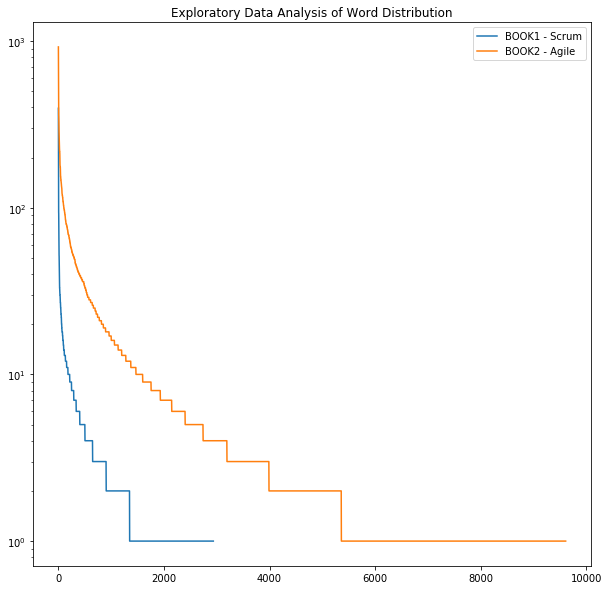

In [31]:
plt.figure(figsize=(10,10))
plt.title("Exploratory Data Analysis of Word Distribution")
plt.semilogy(sorted(x_scrum, reverse= True))
plt.semilogy(sorted(x_agile, reverse=True))
plt.gca().legend(('BOOK1 - Scrum','BOOK2 - Agile'))

***Inferences from the above plot***

In a semilog graph one axis will have logarithmic scale and the other axis will have a linear scale. As we can see from the plot we can see that both the books have a very similar plot hence they have a very similar distribution of words.

### Comparision of 15 most common words which are occuring in both the files

Now in this part of the code we do a bar plot for the 15 most common occuring words and we do it side by side so that it would be easy to compare the plots for Agile and Scrum datasets.

We use a standard consept of matplotlib called subplot. Using the subplot we can align and arrange multiple plots in a single plot which would make it easier for comparision.

<BarContainer object of 15 artists>

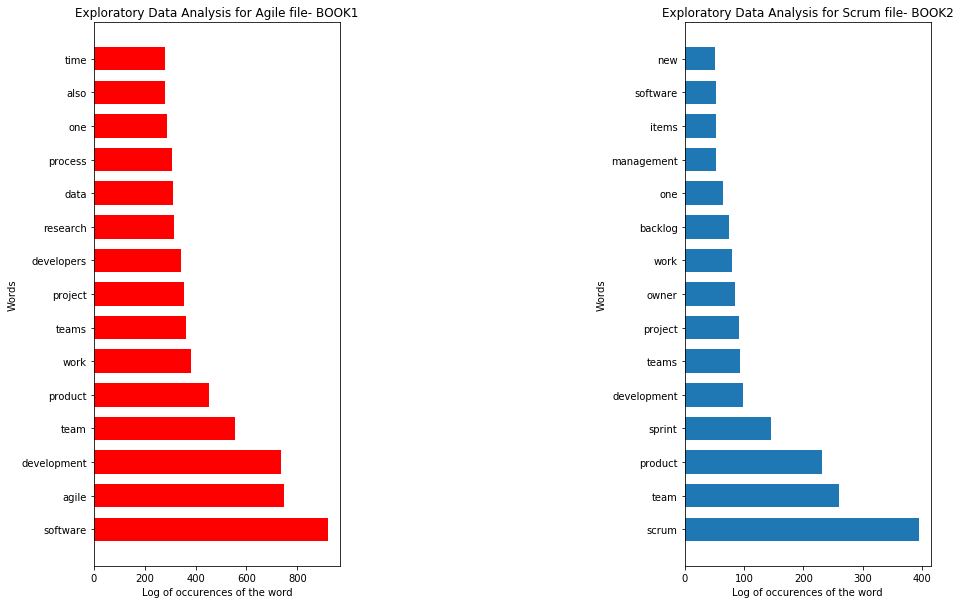

In [32]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.title("Exploratory Data Analysis for Agile file- BOOK1")
plt.xlabel("Log of occurences of the word")
plt.ylabel("Words")
plt.barh(y_agile[:15],x_agile[:15],0.7, color = 'red')



plt.subplot(1,3,3)
plt.title("Exploratory Data Analysis for Scrum file- BOOK2")
plt.xlabel("Log of occurences of the word")
plt.ylabel("Words")
plt.barh(y_scrum[:15],x_scrum[:15],0.7)


The above plot is comparision of 15 most common words in the 2 books. From this plot we can see that the occurences of words in the Book1 is much higher than the occurences of words in Book2. Take for example the top most occuring work in Book1 is software which occurs around 900 times and the top most occuring word in Book2 is scrum which occurs around 400 times.

The 3 top most occuring words in Book1 is:
* software
* agile
* development

The 3 top most occuring words in Book2 is:
* scrum
* team
* product

## References used:

some codes from Monash University Lecture 2,3,4 has been used for this assignment. 